In [1]:
import matplotlib.pyplot as plt
import shap
import pickle
import cloudpickle
import numpy as np
import scipy as sp
import pandas as pd
from comparers import ModelComparer, plot_decision_boundary
from explainers import generate_shap_explanations, calc_feature_order, calc_class_order,\
                       plot_feature_importance_bar, plot_class_importances
from clustering import make_clustering
from tasks.feature_ignored import make_task
shap.initjs()
%matplotlib inline

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

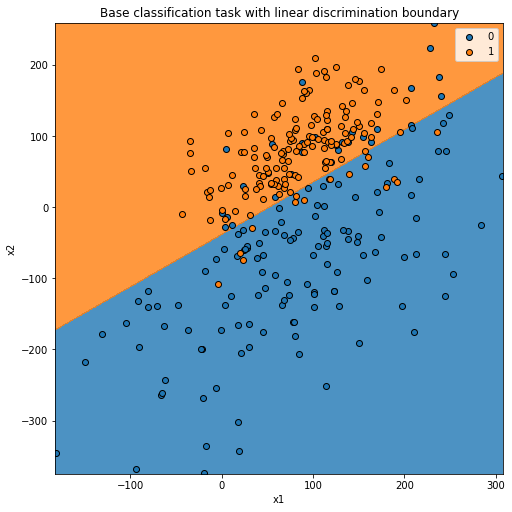

In [4]:
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
plot_decision_boundary(X, y, 'Base classification task with linear discrimination boundary', feature_names,
                       predict=clf_a.predict, class_names=clf_a.classes_,
                       fig=fig, ax=ax)

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

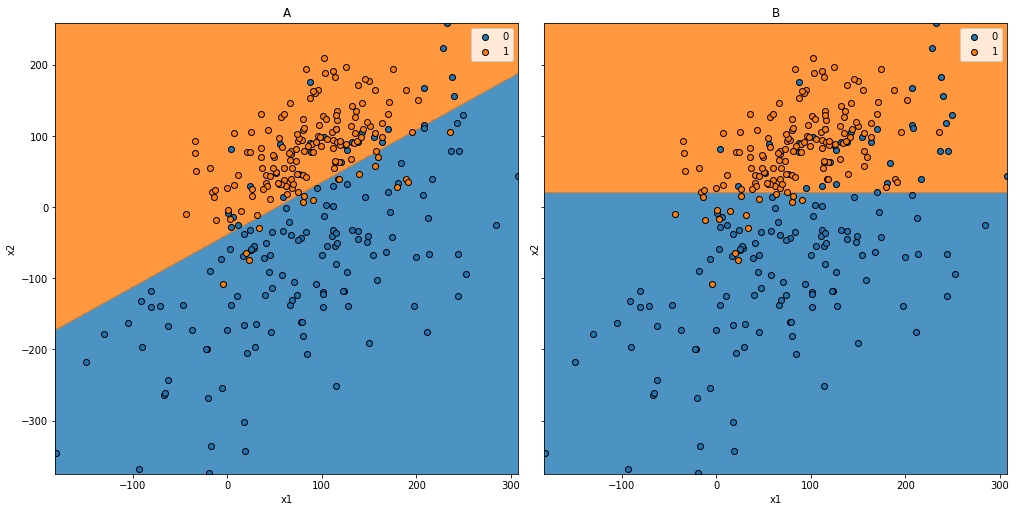

In [6]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='label')

In [7]:
clf_a.coef_, clf_a.intercept_

(array([[-0.02146303,  0.02909487]]), array([1.11018683]))

In [8]:
clf_b.coef_, clf_b.intercept_

(array([[0.        , 0.01784651]]), array([-0.38103095]))

In [9]:
x2_lim = -clf_b.intercept_[0]/clf_b.coef_[0][1]
x2_lim

21.35044499661792

In [10]:
x1_where_x2_crosses = (-clf_a.intercept_[0] - clf_a.coef_[0][1]*x2_lim)/clf_a.coef_[0][0]
x1_where_x2_crosses

80.66778961788788

In [11]:
-clf_a.intercept_[0]/clf_a.coef_[0][1]

-38.15747075547969

In [12]:
-clf_a.coef_[0][0]/clf_a.coef_[0][1]

0.7376911656310202

A logistic regression model discriminates at 0, therefore the decision boundary is given by the function $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$

The decision boundary for A can be expressed as a function of $x_1$: $f(x_1) = -\frac{\beta_0}{\beta_2} - \frac{\beta_1}{\beta_2}x_1$

Since for B it is true that $\beta_1=0$, then the decision boundary is given by $x_2^*=\frac{-\beta_0}{\beta_2}$

- $x_1 > 80.67 \land 21.35 < x2 \leq -38.16 + 0.74 x_1$
- $x_1 \leq 80.67 \land -38.16 + 0.74 x_1 < x2 \leq 21.35$

In [13]:
(-clf_a.intercept_[0] - clf_a.coef_[0][0] * 200)/clf_a.coef_[0][1]

109.38076237072437

In [14]:
-38.15747075547969 + 0.7376911656310202*200

109.38076237072434

In [15]:
comparer.predict_bin_diff([[200, 110]])

array([False])

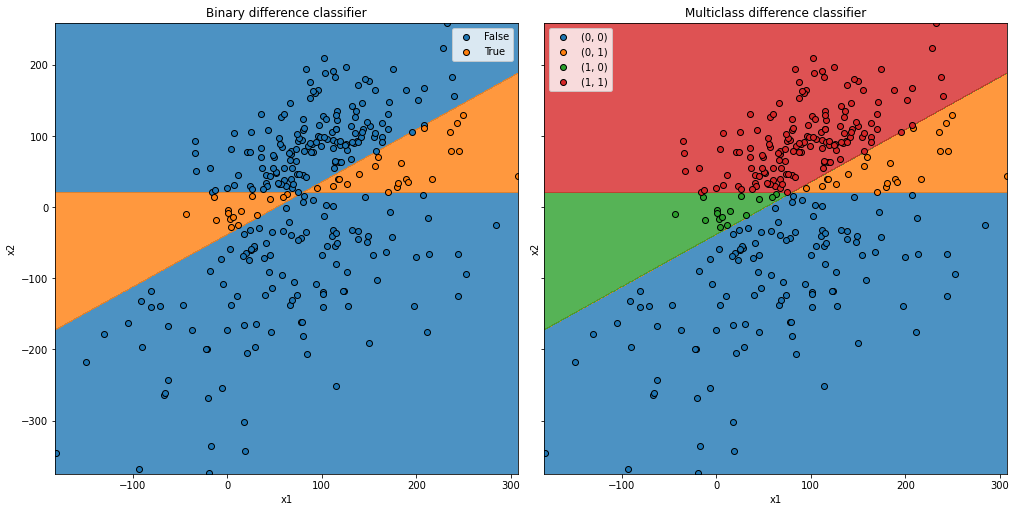

In [16]:
comparer.plot_decision_boundaries(X)

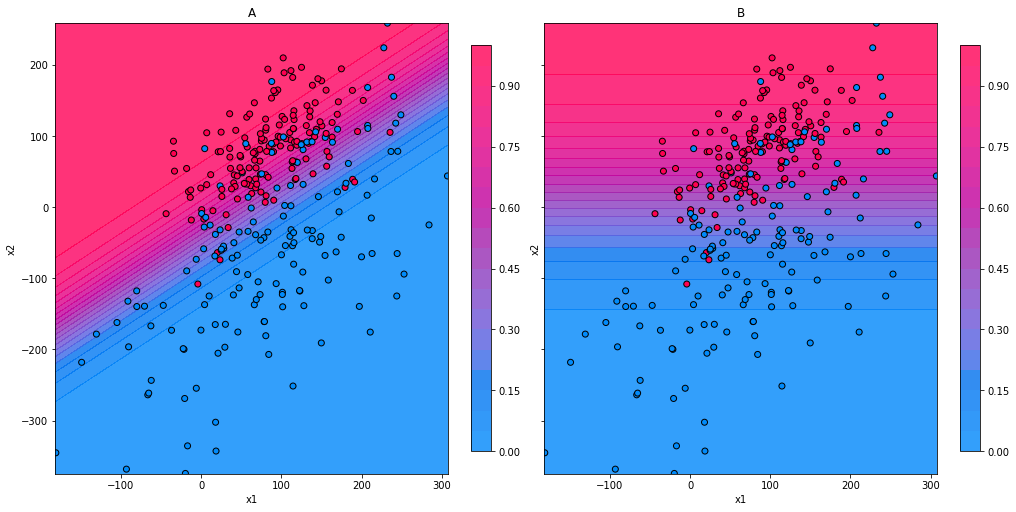

In [4]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='proba')

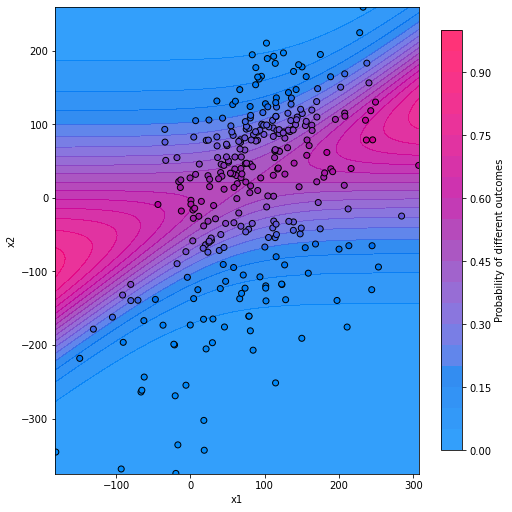

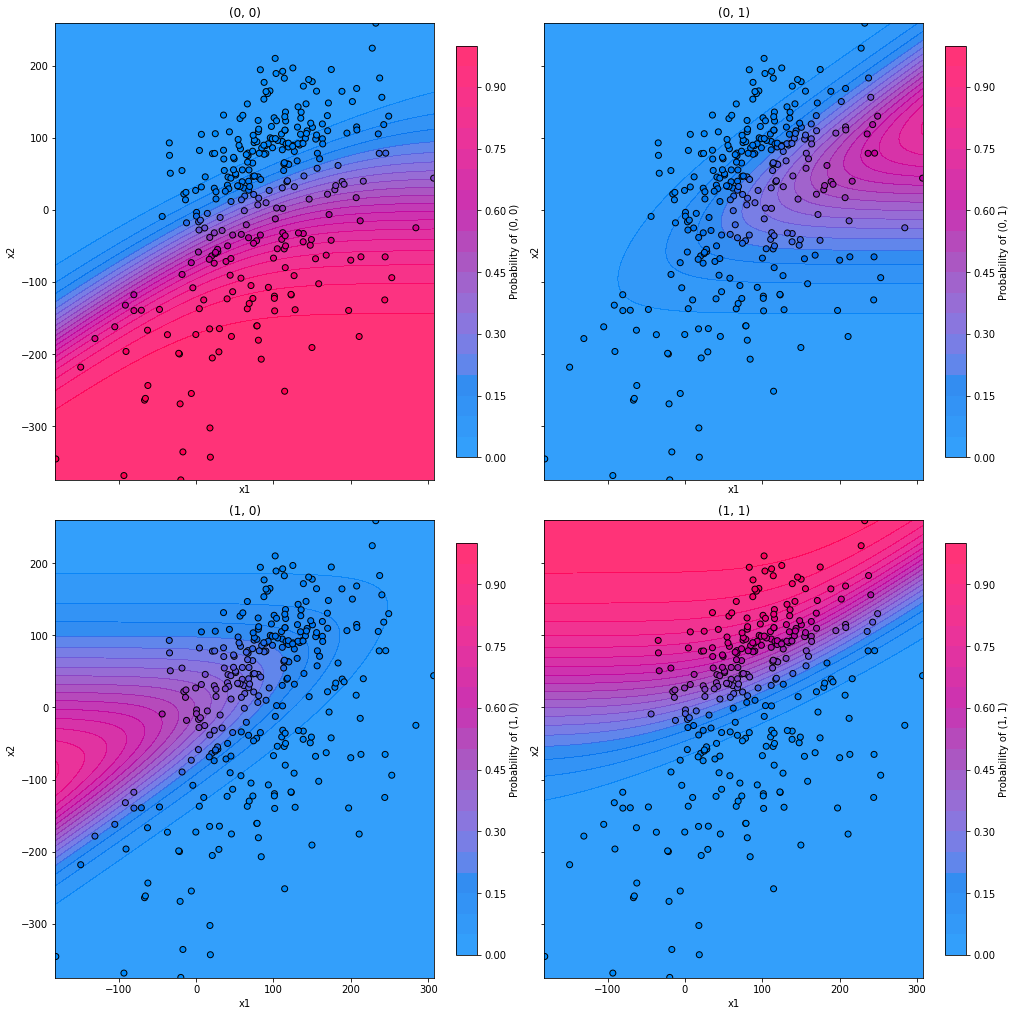

In [4]:
comparer.plot_decision_boundaries(X, kind='proba')

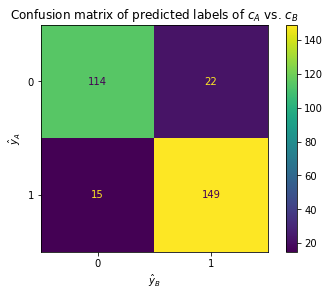

In [19]:
comparer.plot_confusion_matrix(X)